In [1]:
import numpy as np
import skimage.io
import skimage.measure
import pandas as pd
import glob
from natsort import natsorted
%matplotlib inline

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
np.random.seed(sum(map(ord, "aesthetics")))

In [2]:
def read_collection(path='result/label/*.tif'):
    fnames = natsorted(glob.glob(path))
    print(fnames)
    collection = []
    for fname in fnames:
        image = skimage.io.imread(fname)
        collection.append(image)
    return collection

In [3]:
# Grab the groundtruth
wfly_clean_images = read_collection(path='result/label/*.tif')
wfly_bline_images = read_collection(path='result/SharedGenerator/*.pgm')   

['result/label/label_1.tif', 'result/label/label_2.tif']
['result/SharedGenerator/wfly_bline_1.pgm', 'result/SharedGenerator/wfly_bline_2.pgm']


In [4]:
wfly_bm3d_images = read_collection(path='result/BM3D/*.tif')
wfly_ksvd_images = read_collection(path='result/KSVD/*.tif')
wfly_wnnm_images = read_collection(path='result/WNNM/*.tif')

wfly_sharedgen = read_collection(path='result/SharedGenerator/*.tif')
wfly_sharedenc = read_collection(path='result/SharedEncoder/*.tif')
wfly_shareddec = read_collection(path='result/SharedDecoder/*.tif')
wfly_splitgen = read_collection(path='result/SplitGenerator/*.tif')
wfly_sharedgen1 = read_collection(path='result/SharedGenerator_Phase1/*.tif')
wfly_sharedgen2 = read_collection(path='result/SharedGenerator_Phase2/*.tif')
wfly_sharedgen3 = read_collection(path='result/SharedGenerator_Phase3/*.tif')

['result/BM3D/Result_1.tif', 'result/BM3D/Result_2.tif']
['result/KSVD/Result_1.tif', 'result/KSVD/Result_2.tif']
['result/WNNM/Result_1.tif', 'result/WNNM/Result_2.tif']
['result/SharedGenerator/wfly_clean_1.tif', 'result/SharedGenerator/wfly_clean_2.tif']
['result/SharedEncoder/wfly_clean_1.tif', 'result/SharedEncoder/wfly_clean_2.tif']
['result/SharedDecoder/wfly_clean_1.tif', 'result/SharedDecoder/wfly_clean_2.tif']
['result/SplitGenerator/wfly_clean_1.tif', 'result/SplitGenerator/wfly_clean_2.tif']
['result/SharedGenerator_Phase1/wfly_clean_1.tif', 'result/SharedGenerator_Phase1/wfly_clean_2.tif']
['result/SharedGenerator_Phase2/wfly_clean_1.tif', 'result/SharedGenerator_Phase2/wfly_clean_2.tif']
['result/SharedGenerator_Phase3/wfly_clean_1.tif', 'result/SharedGenerator_Phase3/wfly_clean_2.tif']


In [5]:
from skimage.measure import compare_psnr
def calc_psnr(groundtruths, images):
    PSNRs = []
    for gt, im in zip(groundtruths, images):
        PSNR = compare_psnr(gt, im)
        PSNRs.append(PSNR)
    return PSNRs

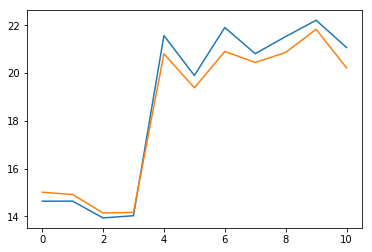

In [6]:
PSNRs_bline = calc_psnr(wfly_clean_images, wfly_bline_images)
PSNRs_bm3d = calc_psnr(wfly_clean_images, wfly_bm3d_images)
PSNRs_ksvd = calc_psnr(wfly_clean_images, wfly_ksvd_images)
PSNRs_wnnm = calc_psnr(wfly_clean_images, wfly_wnnm_images)
PSNRs_sharedgen = calc_psnr(wfly_clean_images, wfly_sharedgen)
PSNRs_sharedenc = calc_psnr(wfly_clean_images, wfly_sharedenc)
PSNRs_shareddec = calc_psnr(wfly_clean_images, wfly_shareddec)
PSNRs_splitgen = calc_psnr(wfly_clean_images, wfly_splitgen)
PSNRs_sharedgen1 = calc_psnr(wfly_clean_images, wfly_sharedgen1)
PSNRs_sharedgen2 = calc_psnr(wfly_clean_images, wfly_sharedgen2)
PSNRs_sharedgen3 = calc_psnr(wfly_clean_images, wfly_sharedgen3)
#sns.boxplot(PSNRs_bline, PSNRs_bm3d)
plt.plot([PSNRs_bline, 
          PSNRs_bm3d, 
          PSNRs_ksvd,
          PSNRs_wnnm, 
          PSNRs_sharedgen, 
          PSNRs_sharedenc,
          PSNRs_shareddec,
          PSNRs_splitgen,
          PSNRs_sharedgen1, 
          PSNRs_sharedgen2, 
          PSNRs_sharedgen3, 
         ])